In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [26]:
import pandas as pd

df = pd.read_csv('sequences.csv', index_col=False)
df

,Accession,Organism_Name,Species,Genotype,Isolate,Length,Nuc_Completeness,Geo_Location,Host,Tissue_Specimen_Source,Collection_Date
0,NC_076039,Bat picornavirus,Shanbavirus aminfuli,NaN,BtRf-PicoV-1/YN2012,6624,complete,China,Rhinolophus ferrumequinum,NaN,2010-12
1,NC_076040,Bat picornavirus,Shanbavirus aminfuli,NaN,BtNv-PicoV/SC2013,7048,complete,China,Nyctalus velutinus,NaN,2013-03
2,NC_043071,Bat picornavirus,Shanbavirus aminfuli,NaN,BtMr-PicoV/JX2010,7555,complete,China,Myotis ricketti,NaN,2010-10
3,NC_043072,Bat picornavirus BatPV/V1/13 Hun,Mischivirus beminio,NaN,NaN,6855,complete,Hungary,Miniopterus schreibersii,feces,2013
4,NC_038313,Bat hepatovirus SMG18520Minmav2014,Hepatovirus cemanavi,NaN,SMG18520Minmav2014,7570,complete,Madagascar,Miniopterus,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...
1066,HM228880,Bat kobuvirus TM246k,Bat kobuvirus TM246k,NaN,TM246k,206,partial,USA,Chiroptera,feces,2008-08
1067,HM228881,Bat kobuvirus TM001k,Bat kobuvirus TM001k,NaN,TM001k,1977,partial,USA,Chiroptera,feces,2008-08
1068,HM228882,Bat kobuvirus TM003k,Bat kobuvirus TM003k,NaN,TM003k,1335,partial,USA,Chiroptera,feces,2008-08
1069,HM228883,Bat kobuvirus TM046k,Bat kobuvirus TM046k,NaN,TM046k,595,partial,USA,Chiroptera,feces,2008-08


In [27]:
# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
virus_species = df['Species'].value_counts()
print(f"Всего уникальных видов вирусов: {len(virus_species)}")
print("\nТоп-10 самых распространенных видов:")
print(virus_species.head(10))


=== АНАЛИЗ ВИДОВ ВИРУСОВ ===
Всего уникальных видов вирусов: 104

Топ-10 самых распространенных видов:
Species
Picornaviridae sp.                 499
Shanbavirus aminfuli                94
Scotophilus kuhlii picornavirus     64
Kobuvirus sp.                       41
Scotophilus kuhlii parechovirus     28
Bat hepatovirus                     27
Bat picornavirus 3                  21
Eidolon dupreanum kobuvirus         20
Parechovirus sp.                    17
Hepatovirus sp.                     16
Name: count, dtype: int64


In [ ]:
geo_locations = df['Geo_Location'].value_counts()
print(f"Всего уникальных географических локаций: {len(geo_locations)}")
print("\nТоп-10 самых частых локаций:")
print(geo_locations.head(10))


=== ГЕОГРАФИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ ===
Всего уникальных географических локаций: 49

Топ-10 самых частых локаций:
Geo_Location
China: Guangxi     288
China              258
Viet Nam           130
China: Yunnan       83
China: Jiangxi      45
Madagascar          36
China: Xinjiang     29
China: Jilin        20
Germany             17
Bulgaria            16
Name: count, dtype: int64


In [ ]:
host_organisms = df['Host'].value_counts()
print(f"Всего уникальных видов хозяев: {len(host_organisms)}")
print("\nТоп-10 самых частых хозяев:")
print(host_organisms.head(10))


=== АНАЛИЗ ОРГАНИЗМОВ-ХОЗЯЕВ ===
Всего уникальных видов хозяев: 68

Топ-10 самых частых хозяев:
Host
Scotophilus kuhlii           240
Miniopterus schreibersii     122
Rhinolophus sinicus           89
Rhinolophus pearsonii         48
Rhinolophus affinis           42
Taphozous melanopogon         39
Hipposideros larvatus         36
Pipistrellus pipistrellus     35
Eidolon dupreanum             34
Rhinolophus sp.               30
Name: count, dtype: int64


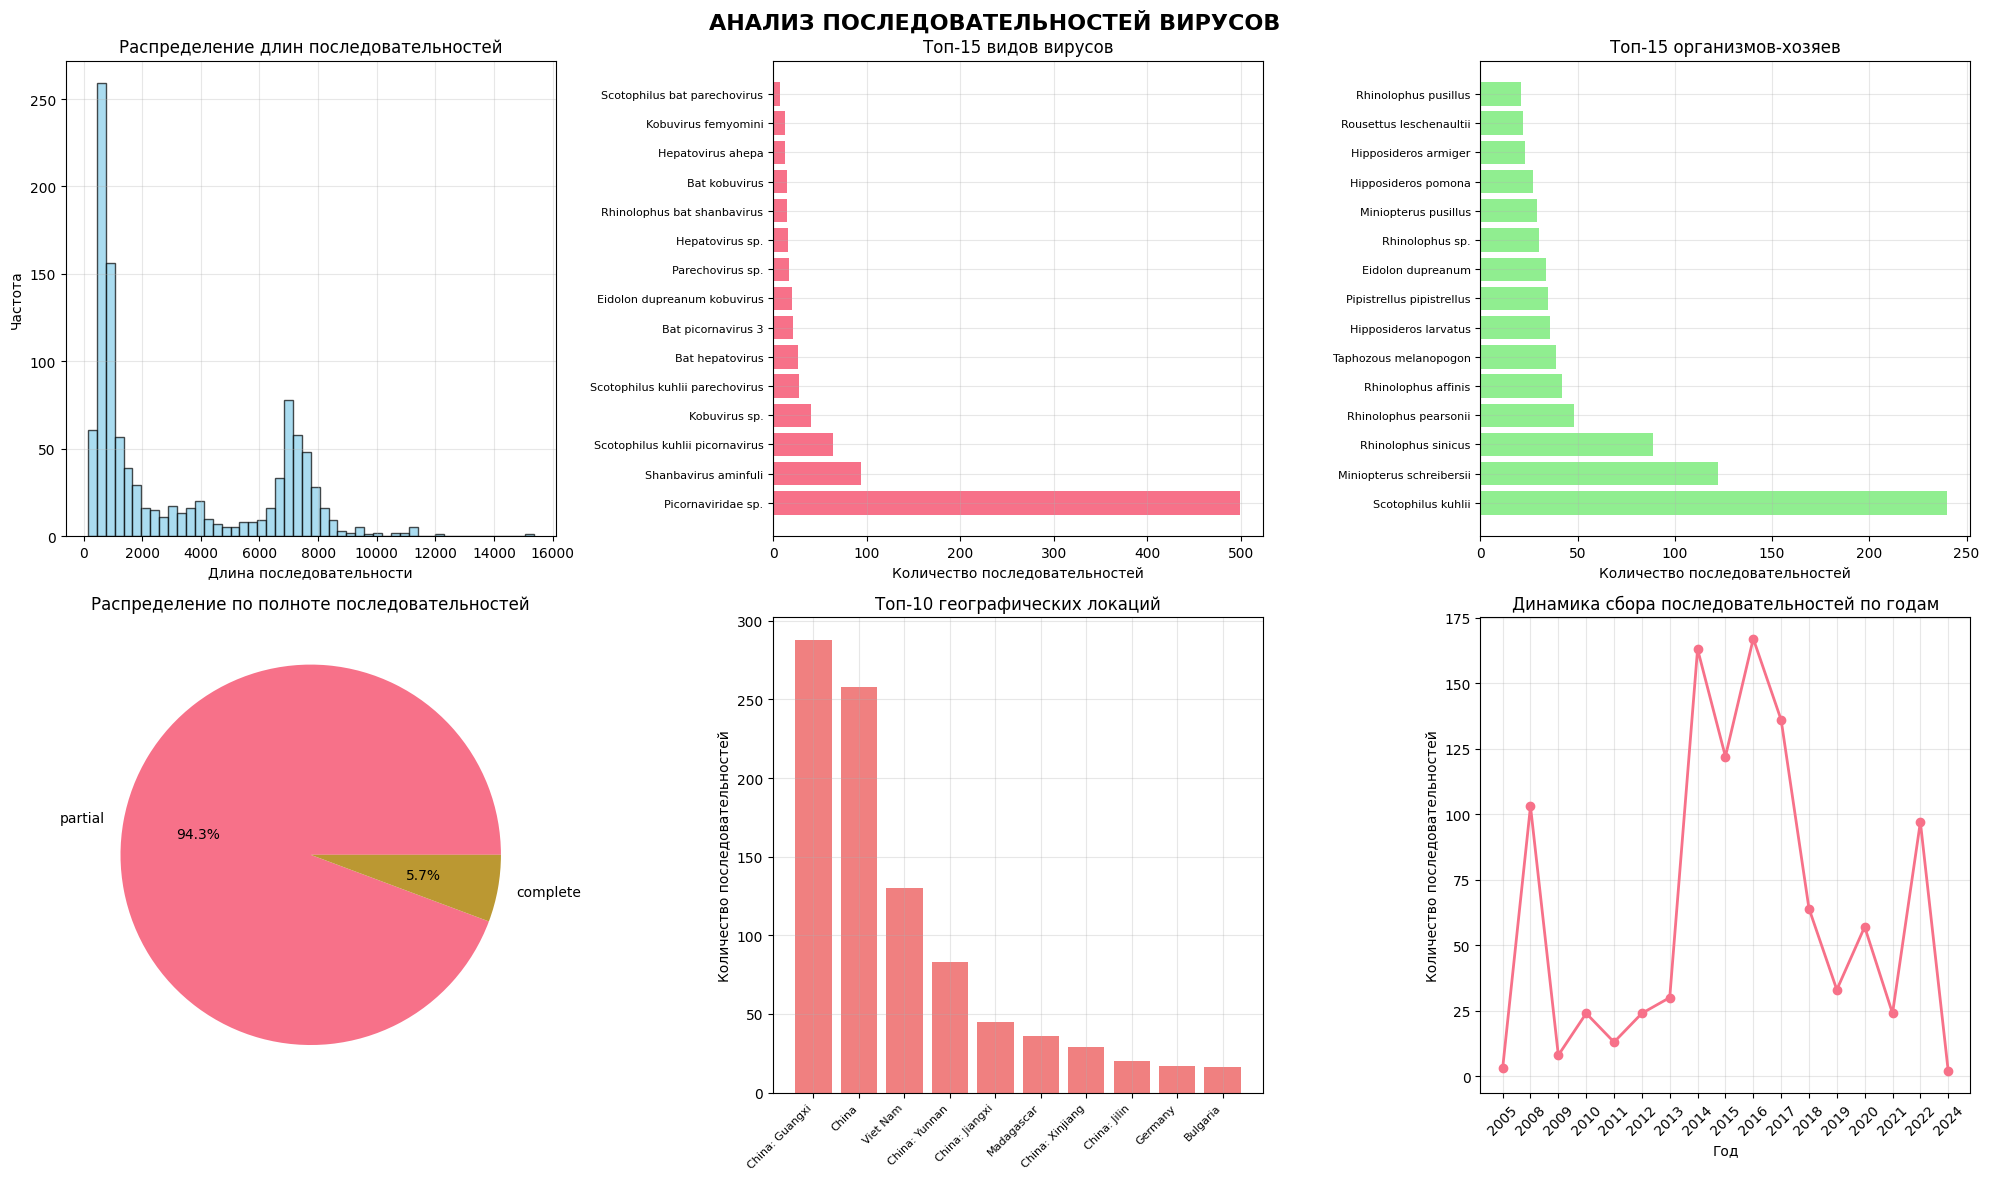

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('АНАЛИЗ ПОСЛЕДОВАТЕЛЬНОСТЕЙ ВИРУСОВ', fontsize=16, fontweight='bold')

# 1. Распределение длин последовательностей
axes[0, 0].hist(df['Length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Длина последовательности')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Распределение длин последовательностей')
axes[0, 0].grid(True, alpha=0.3)
# 2. Топ-15 видов вирусов
top_species = virus_species.head(15)
axes[0, 1].barh(range(len(top_species)), top_species.values)
axes[0, 1].set_yticks(range(len(top_species)))
axes[0, 1].set_yticklabels(top_species.index, fontsize=8)
axes[0, 1].set_xlabel('Количество последовательностей')
axes[0, 1].set_title('Топ-15 видов вирусов')
axes[0, 1].grid(True, alpha=0.3)
# 3. Топ-15 организмов-хозяев
top_hosts = host_organisms.head(15)
axes[0, 2].barh(range(len(top_hosts)), top_hosts.values, color='lightgreen')
axes[0, 2].set_yticks(range(len(top_hosts)))
axes[0, 2].set_yticklabels(top_hosts.index, fontsize=8)
axes[0, 2].set_xlabel('Количество последовательностей')
axes[0, 2].set_title('Топ-15 организмов-хозяев')
axes[0, 2].grid(True, alpha=0.3)

# 4. Распределение по полноте последовательностей
completeness_counts = df['Nuc_Completeness'].value_counts()
axes[1, 0].pie(completeness_counts.values, labels=completeness_counts.index, autopct='%1.1f%%')
axes[1, 0].set_title('Распределение по полноте последовательностей')

# 5. Топ-10 географических локаций
top_locations = geo_locations.head(10)
axes[1, 1].bar(range(len(top_locations)), top_locations.values, color='lightcoral')
axes[1, 1].set_xticks(range(len(top_locations)))
axes[1, 1].set_xticklabels(top_locations.index, rotation=45, ha='right', fontsize=8)
axes[1, 1].set_ylabel('Количество последовательностей')
axes[1, 1].set_title('Топ-10 географических локаций')
axes[1, 1].grid(True, alpha=0.3)

# 6. Распределение по годам сбора
# Извлекаем год из даты сбора
df['Collection_Year'] = df['Collection_Date'].str.extract(r'(\d{4})')
year_counts = df['Collection_Year'].value_counts().sort_index()

axes[1, 2].plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=6)
axes[1, 2].set_xlabel('Год')
axes[1, 2].set_ylabel('Количество последовательностей')
axes[1, 2].set_title('Динамика сбора последовательностей по годам')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()